Final Project Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# Load dataset
file_path = '/content/final_education_illegal_pets.csv' 
data = pd.read_csv(file_path)

Bar chart: types of illegal pets in NYC

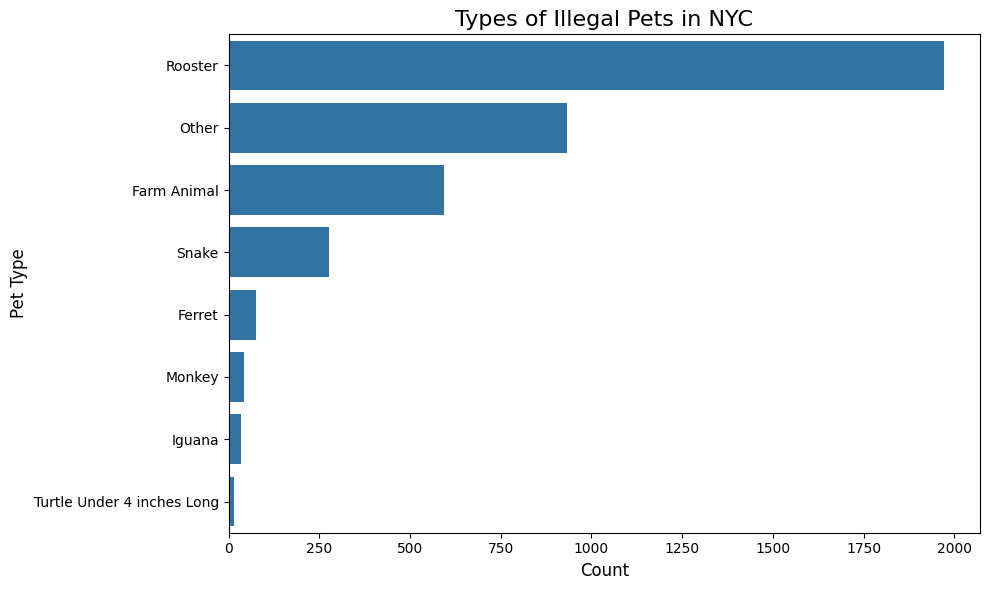

In [ ]:
# 1. Bar chart of types of illegal pets
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Descriptor'], order=data['Descriptor'].value_counts().index)
plt.title("Types of Illegal Pets in NYC", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Pet Type", fontsize=12)
plt.tight_layout()
plt.show()

Pie chart: incidents across boroughs

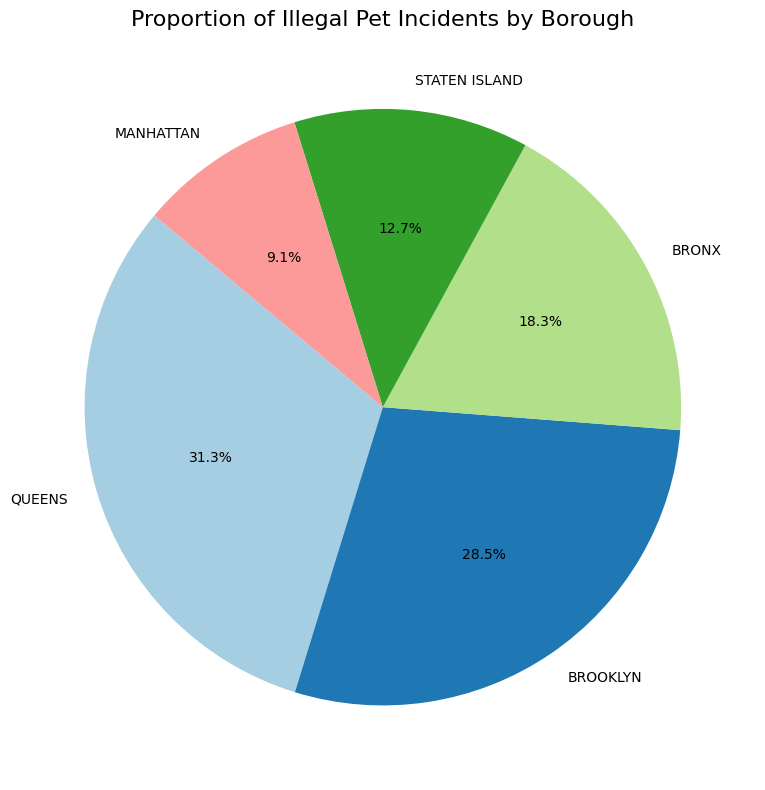

In [ ]:
# 2. Pie chart of incidents across boroughs
borough_counts = data['Borough'].value_counts()
plt.figure(figsize=(8, 8))
borough_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proportion of Illegal Pet Incidents by Borough", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.show()

 Density map: illegal pets in NYC

In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Filter data for the year 2020
data['year'] = pd.to_datetime(data['Created Date']).dt.year
pets_2020 = data[data['year'] == 2020]

# Create the map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Prepare heatmap data
heat_data = pets_2020[['Latitude', 'Longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=8).add_to(nyc_map)

# Display the map directly in the notebook
display(nyc_map)

Line Plot: Different education level over time

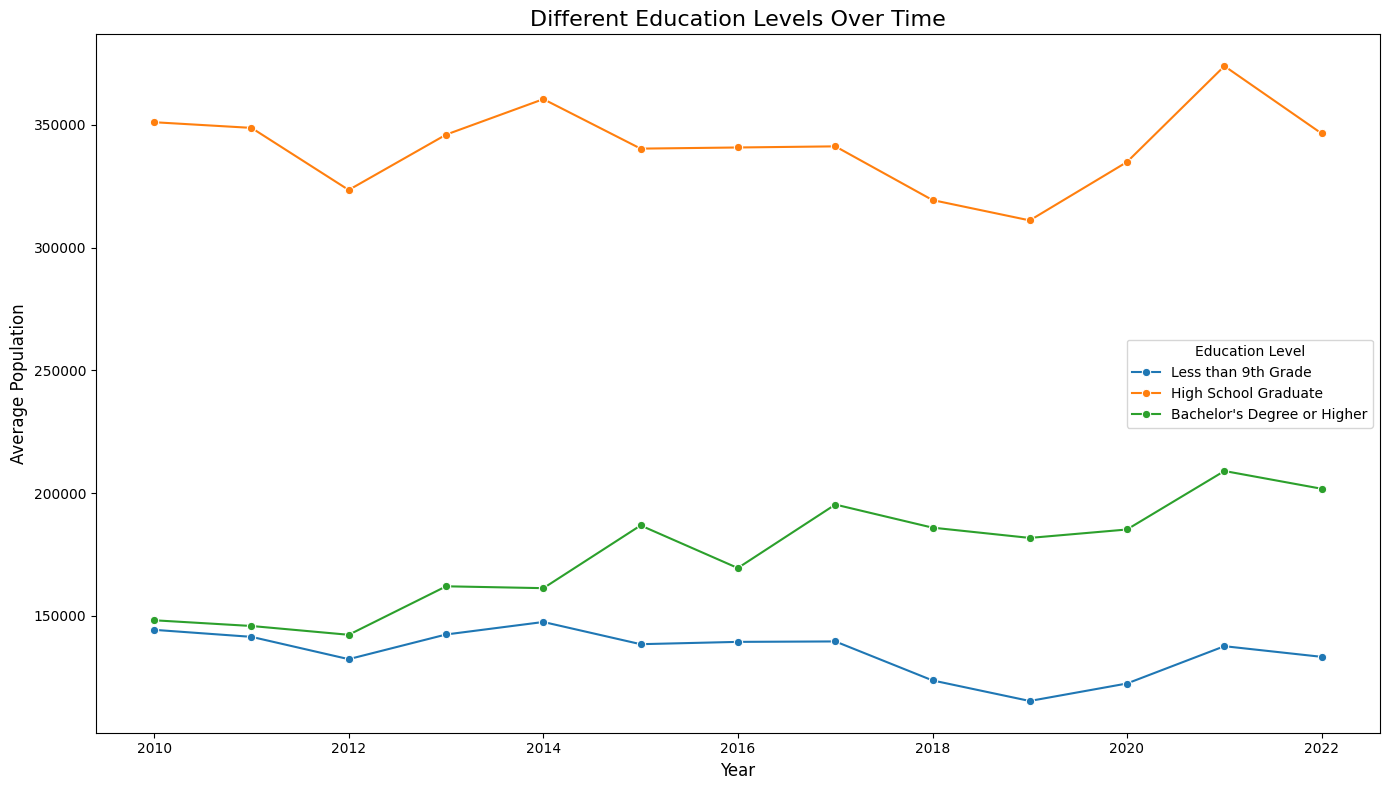

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate education data by year
education_levels_over_time = data.groupby('year')[
    ['pop_25_less_9th', 'pop_25_hs_grad', 'pop_25_bach_plus']
].mean().reset_index()

# Melt the data for easier plotting with Seaborn
education_levels_long = education_levels_over_time.melt(
    id_vars='year',
    value_vars=['pop_25_less_9th', 'pop_25_hs_grad', 'pop_25_bach_plus'],
    var_name='Education Level',
    value_name='Population'
)

# Map the correct labels to the "Education Level" column
education_level_mapping = {
    'pop_25_less_9th': 'Less than 9th Grade',
    'pop_25_hs_grad': 'High School Graduate',
    'pop_25_bach_plus': 'Bachelor\'s Degree or Higher'
}
education_levels_long['Education Level'] = education_levels_long['Education Level'].map(education_level_mapping)

# Plot: Different education levels over time
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=education_levels_long,
    x='year',
    y='Population',
    hue='Education Level',
    marker='o'
)
plt.title("Different Education Levels Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Population", fontsize=12)
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()


Bar Plot: Different education level by districts

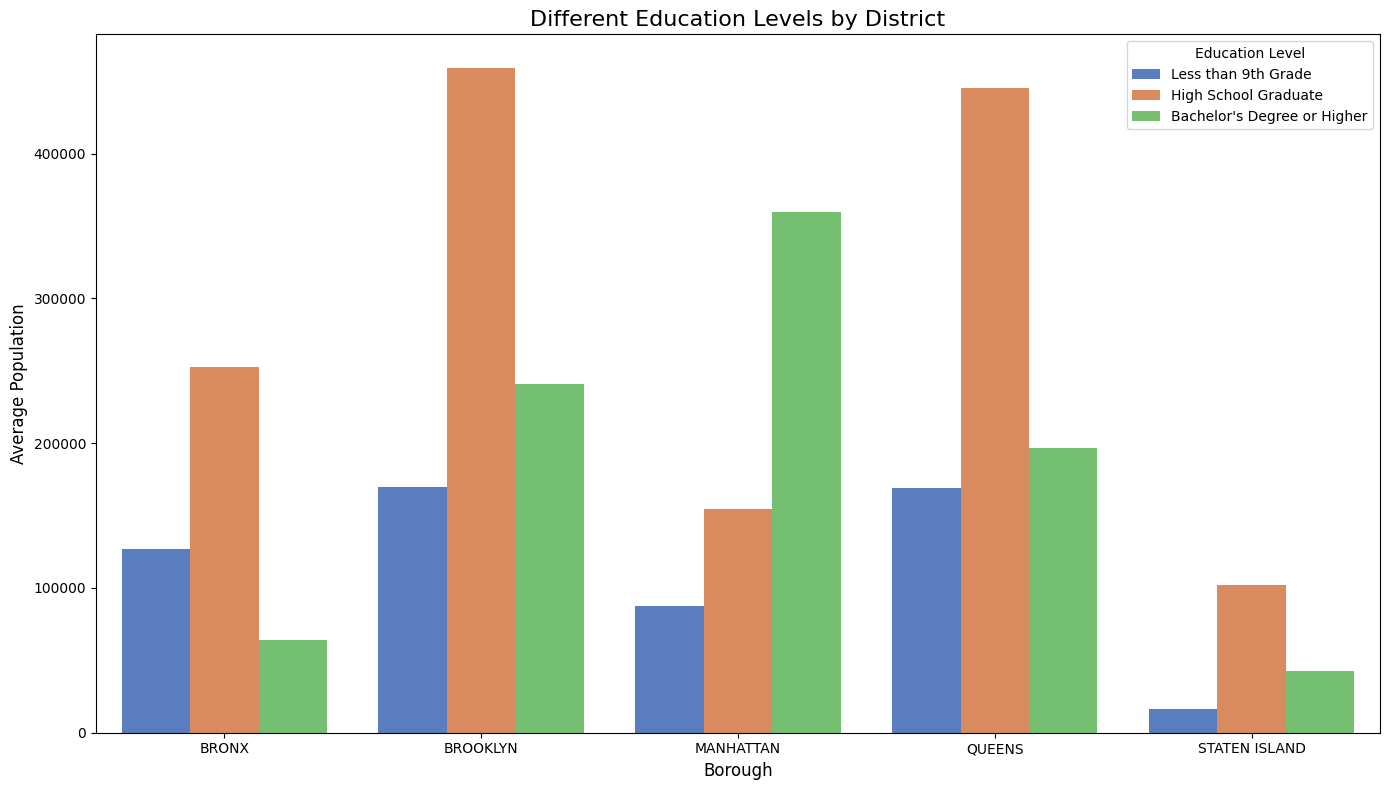

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate education data by borough
education_levels_by_district = data.groupby('Borough')[
    ['pop_25_less_9th', 'pop_25_hs_grad', 'pop_25_bach_plus']
].mean().reset_index()

# Melt the data for easier plotting with Seaborn
education_levels_long = education_levels_by_district.melt(
    id_vars='Borough',
    value_vars=['pop_25_less_9th', 'pop_25_hs_grad', 'pop_25_bach_plus'],
    var_name='Education Level',
    value_name='Population'
)

# Map the correct labels to the "Education Level" column
education_level_mapping = {
    'pop_25_less_9th': 'Less than 9th Grade',
    'pop_25_hs_grad': 'High School Graduate',
    'pop_25_bach_plus': 'Bachelor\'s Degree or Higher'
}
education_levels_long['Education Level'] = education_levels_long['Education Level'].map(education_level_mapping)

# Plot: Different education levels by district
plt.figure(figsize=(14, 8))
sns.barplot(
    data=education_levels_long,
    x='Borough',
    y='Population',
    hue='Education Level',
    palette='muted'
)
plt.title("Different Education Levels by District", fontsize=16)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Average Population", fontsize=12)
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()


Regression in different districts

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                              OLS Regression Results                             
Dep. Variable:     Illegal_Pet_Incidents   R-squared:                       0.985
Model:                               OLS   Adj. R-squared:                  0.941
Method:                    Least Squares   F-statistic:                     22.37
Date:                   Sat, 30 Nov 2024   Prob (F-statistic):              0.154
Time:                           23:55:19   Log-Likelihood:                -25.722
No. Observations:                      5   AIC:                             59.44
Df Residuals:                          1   BIC:                             57.88
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

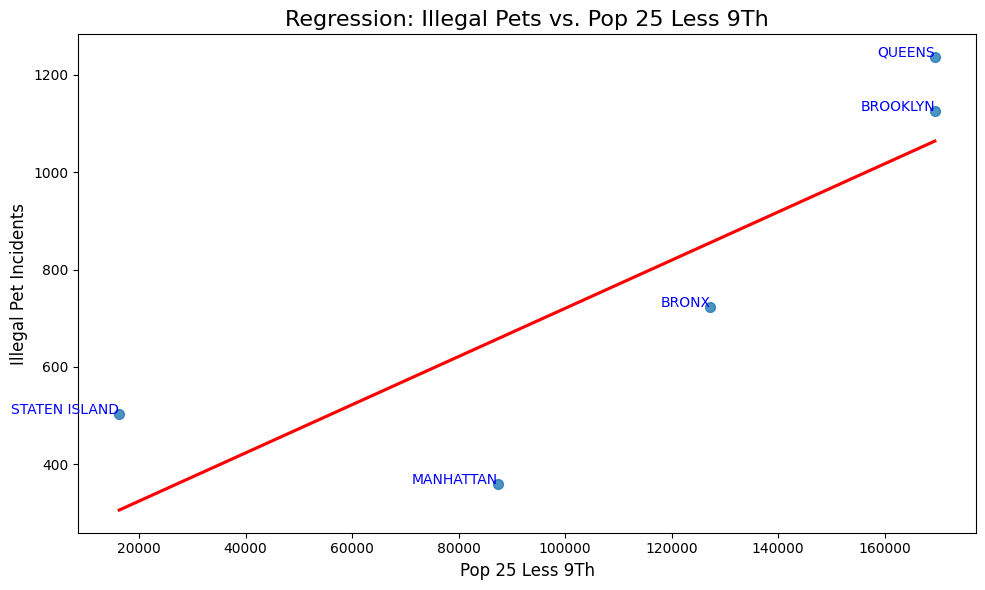

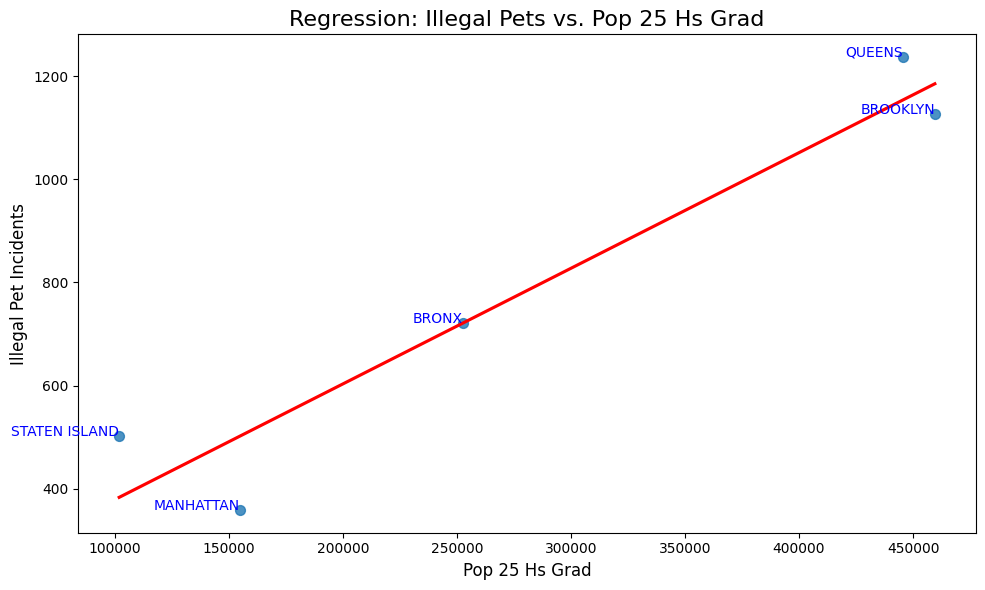

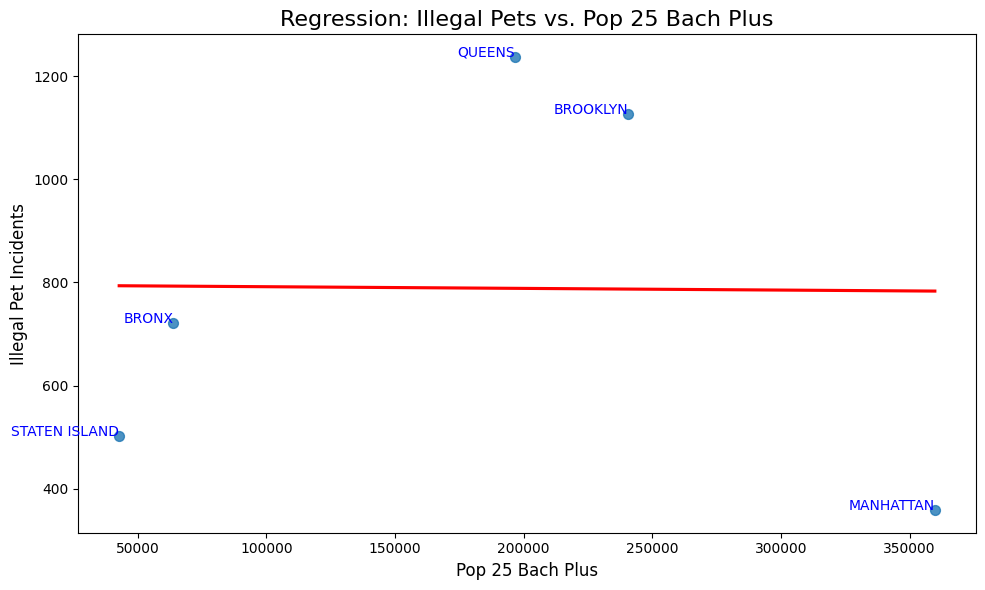

In [ ]:
import requests
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 1. Download NYC borough boundaries GeoJSON
url = "https://data.cityofnewyork.us/api/geospatial/7t3b-ywvw?method=export&format=GeoJSON"
response = requests.get(url)

# Save the GeoJSON to a file
geojson_path = "nyc_boroughs.geojson"
with open(geojson_path, "wb") as file:
    file.write(response.content)

# Load the GeoJSON data
boroughs_gdf = gpd.read_file(geojson_path)

# 2. Aggregate Data
# Count illegal pet incidents by district
incident_counts = data.groupby('Borough')['Descriptor'].count().reset_index()
incident_counts.rename(columns={'Descriptor': 'Illegal_Pet_Incidents'}, inplace=True)

# Calculate mean education levels by district
education_data = data.groupby('Borough')[
    ['pop_25_less_9th', 'pop_25_hs_grad', 'pop_25_bach_plus']
].mean().reset_index()

# Merge datasets
district_data = pd.merge(incident_counts, education_data, on='Borough')


# 3. Perform Regression: Using all education levels as predictors
X = district_data[['pop_25_less_9th', 'pop_25_hs_grad', 'pop_25_bach_plus']]
y = district_data['Illegal_Pet_Incidents']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Visualize the relationship for each education level
# Visualize the relationship for each education level
for feature in ['pop_25_less_9th', 'pop_25_hs_grad', 'pop_25_bach_plus']:
    plt.figure(figsize=(10, 6))

    # Create scatter plot with regression line
    sns.regplot(
        x=district_data[feature],
        y=district_data['Illegal_Pet_Incidents'],
        ci=None,
        scatter_kws={"s": 50},
        line_kws={"color": "red"},
    )

    # Add district names to each point
    for i in range(len(district_data)):
        plt.text(
            x=district_data[feature].iloc[i],
            y=district_data['Illegal_Pet_Incidents'].iloc[i],
            s=district_data['Borough'].iloc[i],
            fontsize=10,
            color="blue",
            ha="right"
        )

    # Add title and labels
    plt.title(f"Regression: Illegal Pets vs. {feature.replace('_', ' ').title()}", fontsize=16)
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Illegal Pet Incidents", fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
# Merge regression data with GeoJSON
map_data = boroughs_gdf.merge(district_data, left_on='boro_name', right_on='Borough', how='left')

# Create the map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add choropleth for regression residuals
map_data['Residuals'] = model.resid  # Add residuals from the regression model
folium.Choropleth(
    geo_data=map_data,
    data=map_data,
    columns=['boro_name', 'Residuals'],
    key_on='feature.properties.boro_name',
    fill_color='RdYlBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Regression Residuals",
).add_to(m)

# Add district names as labels
for _, row in map_data.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],  # Use centroid for label position
        popup=f"Borough: {row['boro_name']}\nResidual: {row['Residuals']:.2f}",
        icon=folium.DivIcon(html=f"<div style='font-size: 12px; color: black;'>{row['boro_name']}</div>")
    ).add_to(m)

# Save and display the map
m.save("regression_map_with_labels.html")
print("Map saved as 'regression_map_with_labels.html'. Open this file to view it.")


Map saved as 'regression_map_with_labels.html'. Open this file to view it.


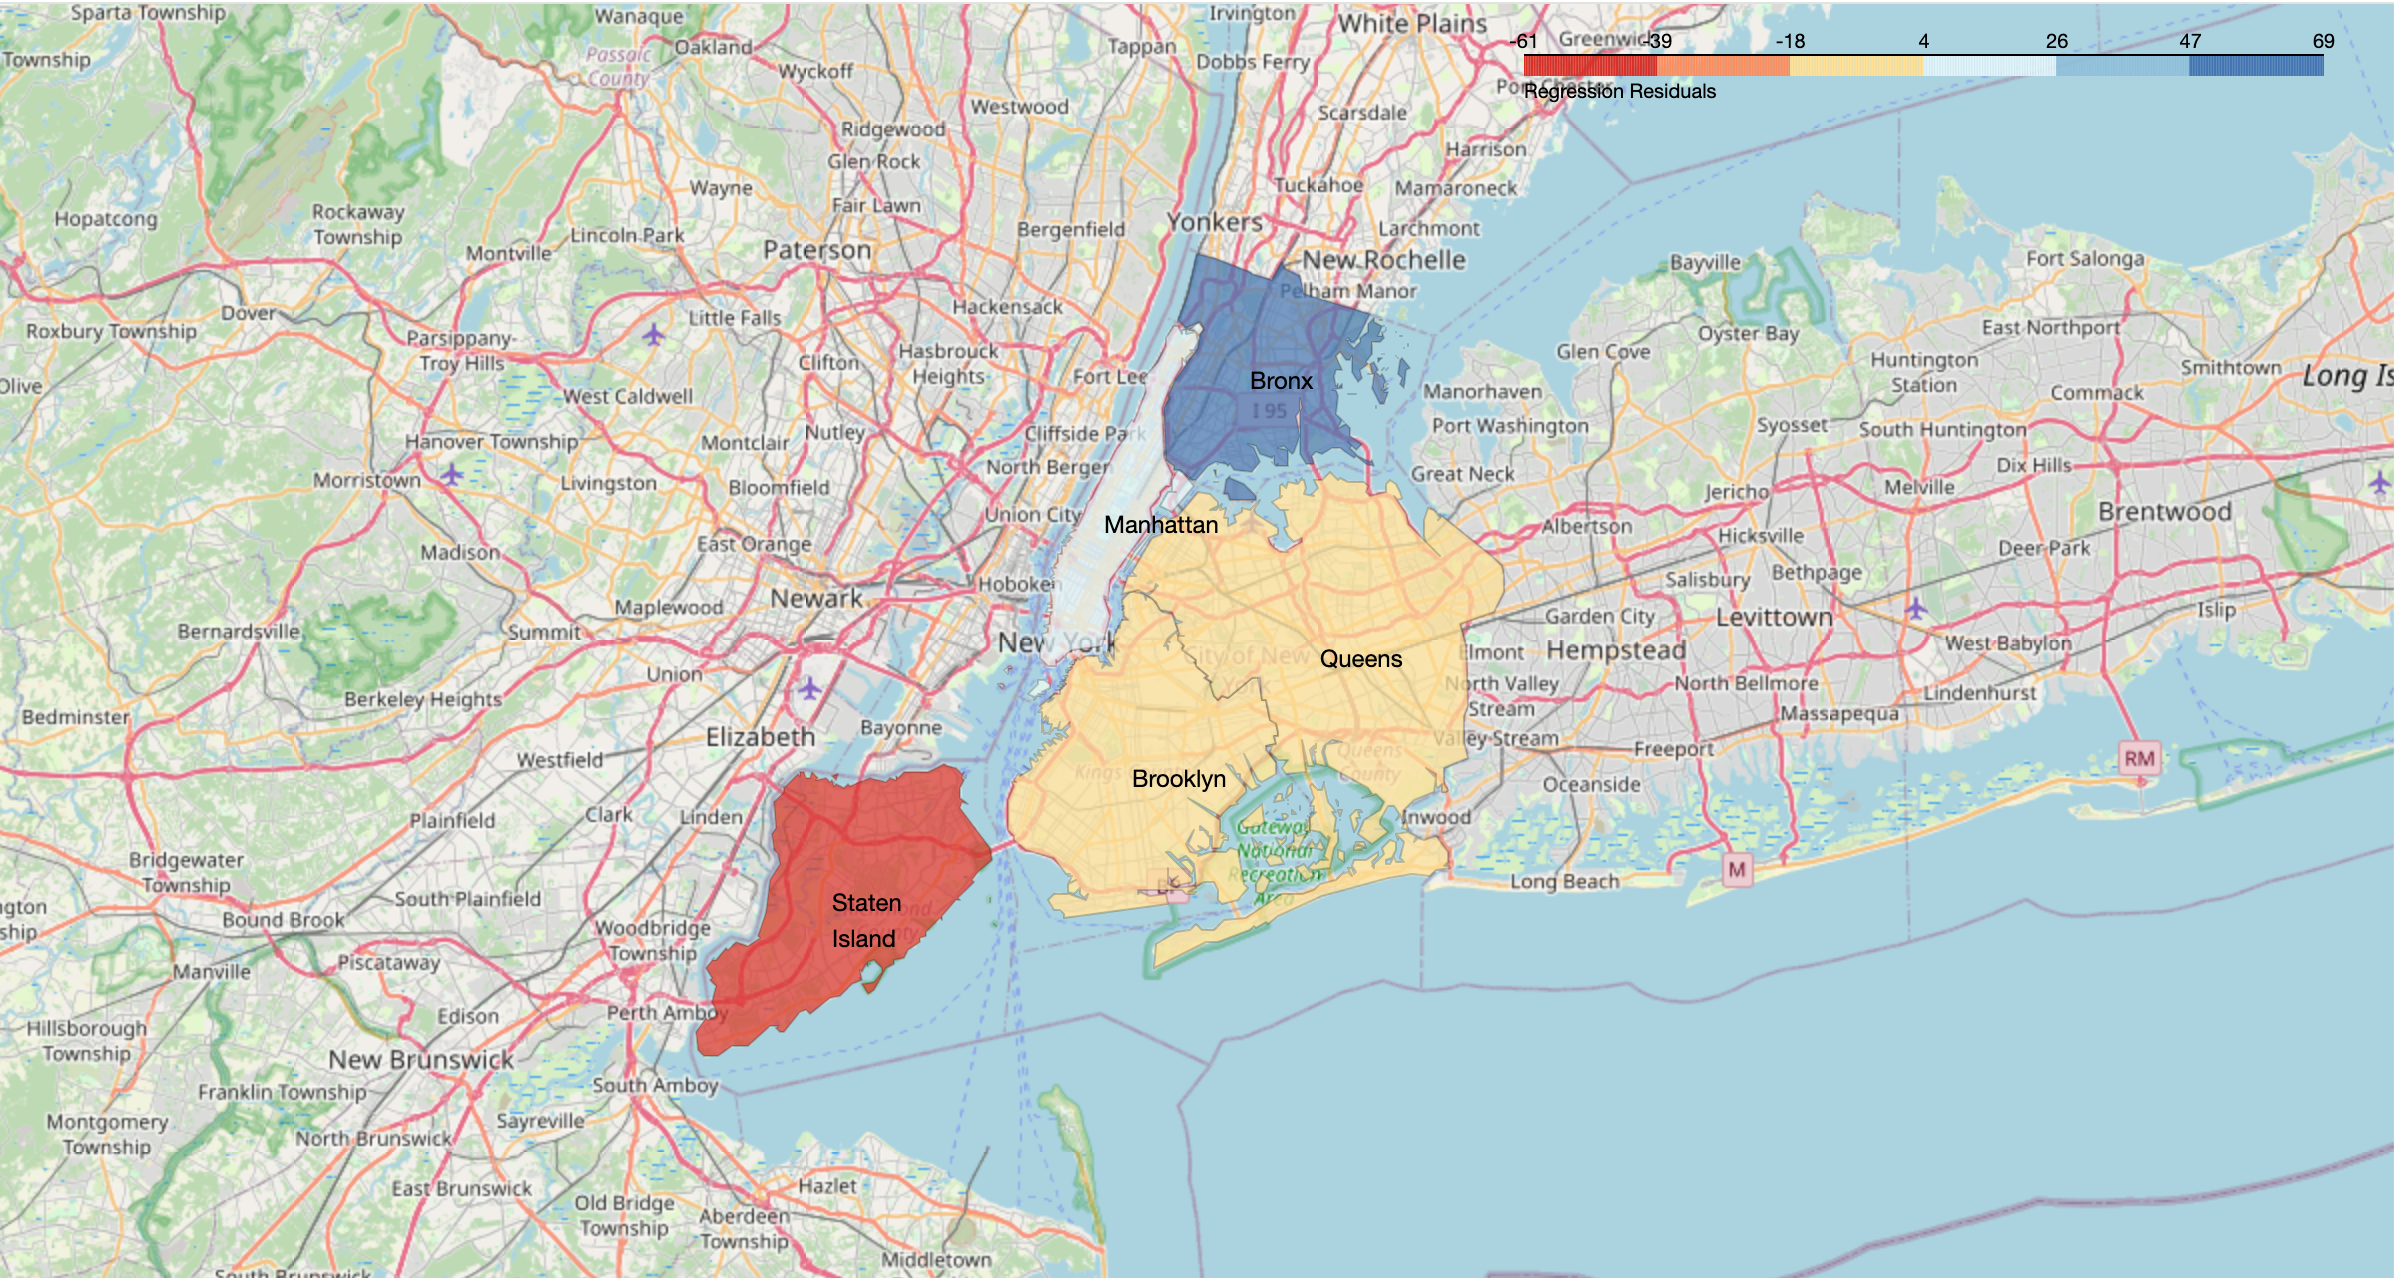